In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  # 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE,ADASYN


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

In [70]:
df=pd.read_csv(r"C:\Class_Notes\Machine Learning\Classification Models\Decision Tree\US_Heart_Patients.csv")

In [71]:
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [72]:
df['Heart-Att'].value_counts()

Heart-Att
0    3596
1     644
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [6]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [7]:
df.shape

(4240, 16)

In [8]:
# find the null values in percentage
df.isnull().sum()*100/df.shape[0]

Gender             0.188679
age                0.047170
education          2.594340
currentSmoker      0.070755
cigsPerDay         0.731132
BP Meds            1.415094
prevalentStroke    0.212264
prevalentHyp       0.047170
diabetes           0.047170
tot cholesterol    1.415094
Systolic BP        0.094340
Diastolic BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

In [9]:
cat = ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']

In [10]:
df.replace({'Male':1,'Female':0},inplace=True)

In [11]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
# Replace Numerical column by mean
for i in df[num].columns:
    df[i].fillna(df[i].mean(),inplace=True)

In [13]:
# Replace categorical column by mode
for i in df[cat].columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

### Model Building

In [15]:
x = df.drop('Heart-Att',axis=1)
y = df.pop('Heart-Att')

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [17]:
x_train.shape

(2968, 15)

### KNN Classifier

In [18]:
KNN = KNeighborsClassifier()

In [19]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

 ### Model Evaluation

In [20]:
y_train_predict = KNN.predict(x_train)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

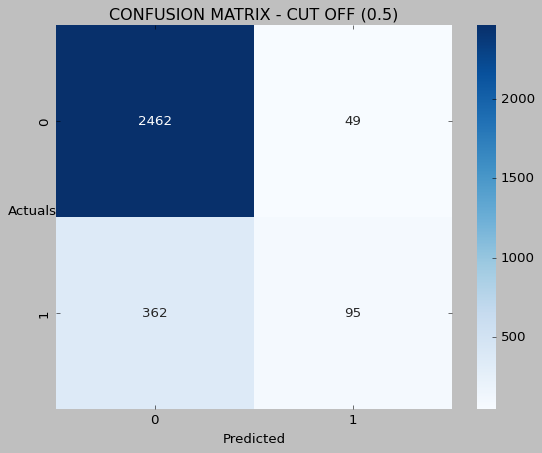

In [21]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [22]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2511
           1       0.66      0.21      0.32       457

    accuracy                           0.86      2968
   macro avg       0.77      0.59      0.62      2968
weighted avg       0.84      0.86      0.83      2968



In [23]:
# Here we have to focus on recall

AUC: 0.865


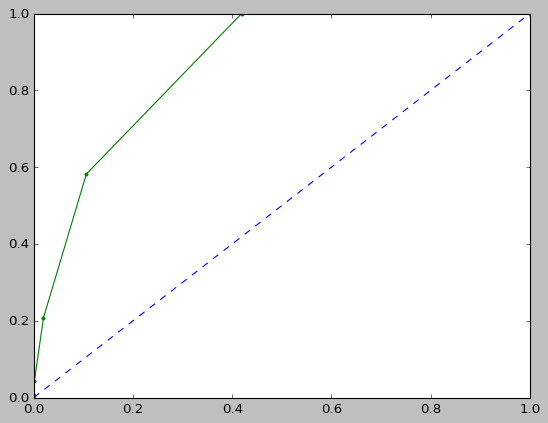

In [24]:
probs = KNN.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [25]:
y_test_predict = KNN.predict(x_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

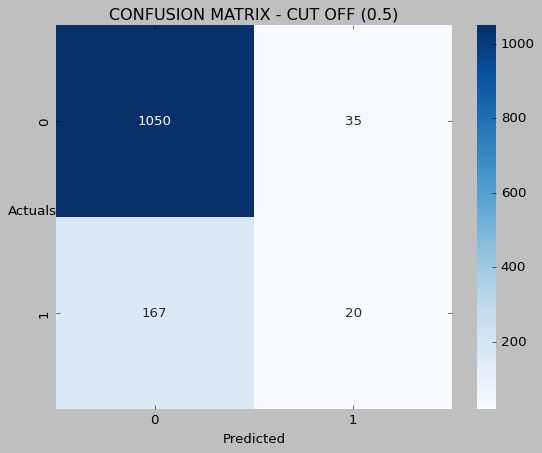

In [26]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [27]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.11      0.17       187

    accuracy                           0.84      1272
   macro avg       0.61      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



AUC: 0.649


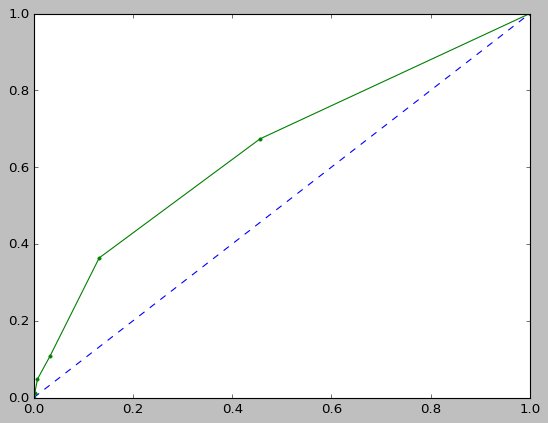

In [28]:
probs = KNN.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [29]:
# So it means KNN is also not good there is drastical change in aoc of train data and aoc of test data.
# It is overfitting in the train data it is good in the train data but it is underfitting in the test data it is not
# that good in the test data.

### Grid Search

In [30]:
# KNeighborsClassifier()

In [31]:
# Create param grid by shift tab in the KNeighborsClassifier() to see the parameters and based on that create param grid
# see the parameters of KNeighborsClassifier() and create the param grid.
param_grid={
    'n_neighbours' : [3,4,5,6,7].
    'weights' : ['uniform', 'distance'],
    'algorithm' :  ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

SyntaxError: invalid syntax (3241878510.py, line 5)

In [32]:
# HW to create grid search for KNN

# Esemble Model

#### Decision Tree with Bagging(Bootstrap Aggregation)

In [33]:
DT = DecisionTreeClassifier()

In [34]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
DT_y_train_predict = DT.predict(x_train)
DT_y_test_predict = DT.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



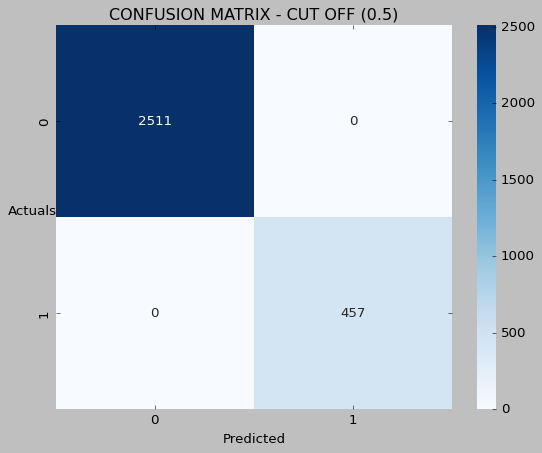

In [36]:
sns.heatmap((metrics.confusion_matrix(y_train,DT_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, DT_y_train_predict))

In [37]:
# The accuracy is 100% in train data mostly the decision Tree overfits in the train data.

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.11      0.17       187

    accuracy                           0.84      1272
   macro avg       0.61      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



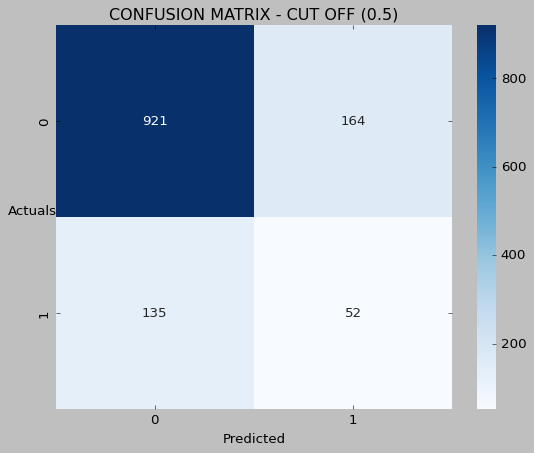

In [38]:
sns.heatmap((metrics.confusion_matrix(y_test,DT_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, y_test_predict))

In [39]:
# In test data accuracy is 84 but precision and recall suffers in this case.

In [40]:
# Now we will see that how we improve the model by using bagging.

## Bagging

In [41]:
bag_DT = BaggingClassifier(estimator=DT, n_estimators=50, random_state=42)
# in estimator we assign the model here we use Decision Tree so we assign Decision tree and then use that as DT, n_estimators = 50 we want to run the model 50 times.

In [42]:
bag_DT.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [43]:
bagDT_y_train_predict = bag_DT.predict(x_train)
bagDT_y_test_predict = bag_DT.predict(x_test)


In [44]:
# here 50 models will run means 50 subsets will created from real data but here we didnt mention the number of records its decided by model.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



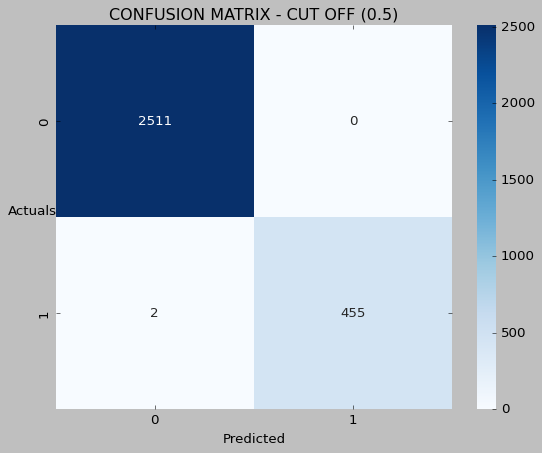

In [45]:
sns.heatmap((metrics.confusion_matrix(y_train,bagDT_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, bagDT_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.38      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.62      0.53      0.52      1272
weighted avg       0.79      0.85      0.80      1272



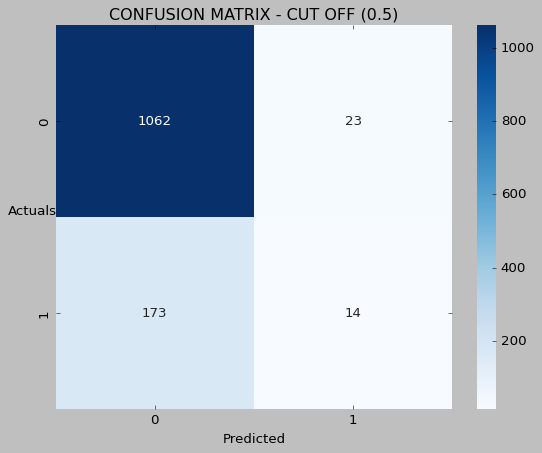

In [46]:
sns.heatmap((metrics.confusion_matrix(y_test,bagDT_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, bagDT_y_test_predict))

In [47]:
# here also the recall is very less we want more recall so now we will try with KNN.

In [48]:
bag_KNN = BaggingClassifier(estimator=KNN, n_estimators=100, random_state=42)
bag_KNN.fit(x_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [49]:
bag_KNN_y_train_predict = bag_KNN.predict(x_train)
bag_KNN_y_test_predict = bag_KNN.predict(x_test)


              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2511
           1       0.77      0.19      0.30       457

    accuracy                           0.87      2968
   macro avg       0.82      0.59      0.61      2968
weighted avg       0.85      0.87      0.83      2968



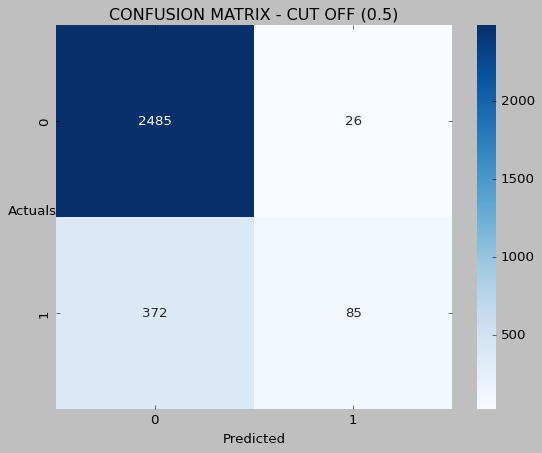

In [50]:
sns.heatmap((metrics.confusion_matrix(y_train,bag_KNN_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, bag_KNN_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.09      0.14       187

    accuracy                           0.84      1272
   macro avg       0.61      0.53      0.53      1272
weighted avg       0.79      0.84      0.80      1272



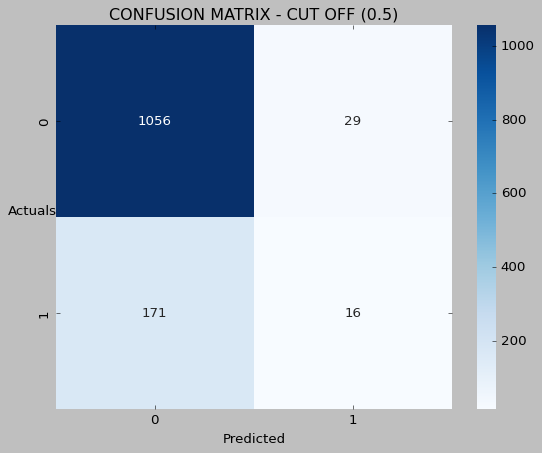

In [51]:
sns.heatmap((metrics.confusion_matrix(y_test,bag_KNN_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, bag_KNN_y_test_predict))

In [52]:
# At the end we create only one model but it is created by no of models here we
# give n_estimators=50 it means it is created by avg of 50 Decision Tree model 
# or avg of 50 KNN models.

In [53]:
# Bagging is also called as Bootstrap aggregation.

# Random Forest

In [54]:
RF = RandomForestClassifier(random_state=10)

In [55]:
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [56]:
RF_y_train_predict = RF.predict(x_train)
RF_y_test_predict = RF.predict(x_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



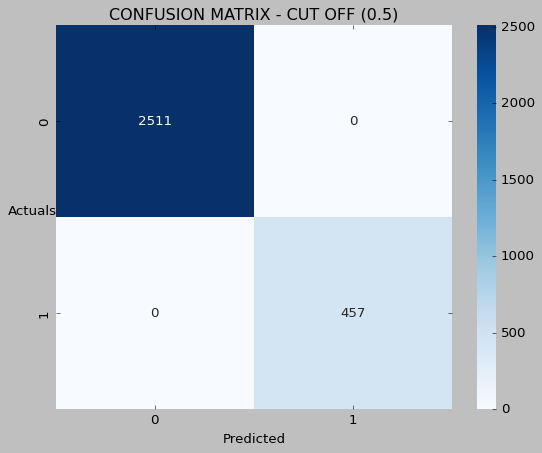

In [57]:
sns.heatmap((metrics.confusion_matrix(y_train,RF_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, RF_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.48      0.05      0.10       187

    accuracy                           0.85      1272
   macro avg       0.67      0.52      0.51      1272
weighted avg       0.80      0.85      0.80      1272



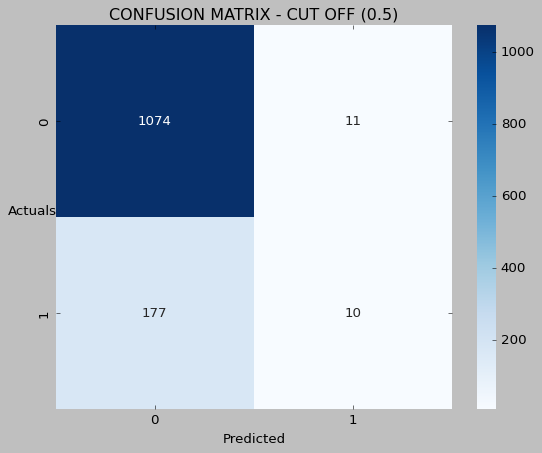

In [58]:
sns.heatmap((metrics.confusion_matrix(y_test,RF_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, RF_y_test_predict))

In [59]:
## here in this also in train data model is overfitting and in the test data recall will suffer.

### Random Forest with Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(x_train, y_train) 

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.846 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.844 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.847 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.844 total time=   0.8s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.843 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.847 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.845 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.843 total time=   0.8s
[CV 3/3] END max_depth=3, max_fea

In [65]:
RF_model_grid_y_train_predict = model_grid.predict(x_train)
RF_model_grid_y_test_predict = model_grid.predict(x_test)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2511
           1       1.00      0.25      0.40       457

    accuracy                           0.89      2968
   macro avg       0.94      0.63      0.67      2968
weighted avg       0.90      0.89      0.85      2968



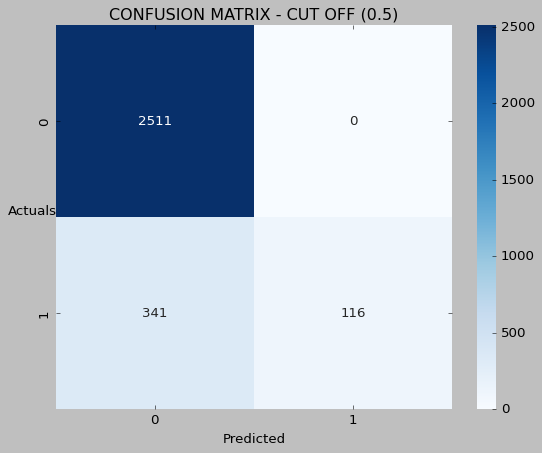

In [66]:
sns.heatmap((metrics.confusion_matrix(y_train,RF_model_grid_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, RF_model_grid_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.50      0.06      0.11       187

    accuracy                           0.85      1272
   macro avg       0.68      0.52      0.51      1272
weighted avg       0.81      0.85      0.80      1272



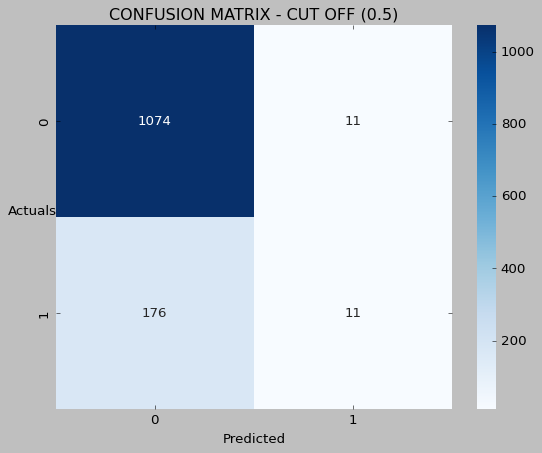

In [67]:
sns.heatmap((metrics.confusion_matrix(y_test,RF_model_grid_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, RF_model_grid_y_test_predict))

In [68]:
# Still in test datta recall is less now first we balance the data and then use grid search on that

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_resample, y_train_resample = smote.fit_resample(x_train,y_train)

In [79]:
df['Heart-Att'].value_counts()

Heart-Att
0    3596
1     644
Name: count, dtype: int64

In [75]:
x_train.shape

(2968, 15)

In [76]:
y_train.shape

(2968,)

In [77]:
x_train_resample.shape 

(5022, 15)

In [78]:
y_train_resample.shape 

(5022,)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(x_train_resample, y_train_resample) 

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.707 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.762 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.773 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.706 total time=   1.5s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.761 total time=   1.5s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.774 total time=   1.4s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.701 total time=   2.3s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.760 total time=   1.5s
[CV 3/3] END max_depth=3, max_fea

# Boosting

## 1.AdaBoost

In [ ]:
adb = AdaBoostClassifier()

In [ ]:
adb.fit(x_train,y_train)

In [ ]:
adb_y_train_predict = adb.predict(x_train)
adb_y_test_predict = adb.predict(x_test)


In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,adb_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, adb_y_train_predict))

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,adb_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, adb_y_test_predict))

In [ ]:
# HW run grid search for every model.

## 2.GradientBoost

In [ ]:
GB = GradientBoostingClassifier()

In [ ]:
GB.fit(x_train,y_train)

In [ ]:
GB_y_train_predict = GB.predict(x_train)
GB_y_test_predict = GB.predict(x_test)


In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,GB_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, GB_y_train_predict))

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,GB_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, GB_y_test_predict))

### Gradient Boost using grid search

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],      # Step size shrinkage used in updates
    'max_depth': [3, 4, 5],                  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]             # Fraction of samples used for fitting individual base learners
}

grid_search = GridSearchCV(estimator=GB, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
GB_model_grid_y_train_predict = grid_search.predict(x_train)
GB_model_grid_y_test_predict = grid_search.predict(x_test)


In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,GB_model_grid_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, GB_model_grid_y_train_predict))

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,GB_model_grid_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, GB_model_grid_y_test_predict))

In [ ]:
# Learn Multicollinearuty
# Learn Variance Inflation Factor.

In [ ]:
# Create Grid Search for all models.